In [1]:
# Load Dependencies
import numpy
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

In [2]:
# Read data
data_mesh = mesh.Mesh.from_file('vessel.stl')

/home/ari/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


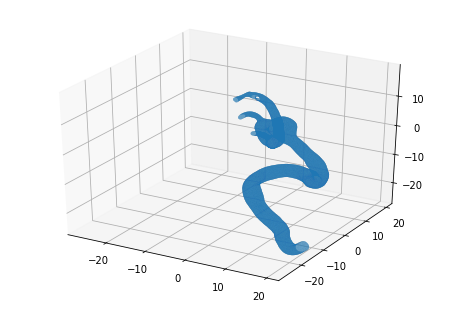

In [51]:
%matplotlib inline
def plot_data_mesh(vectors, scale = data_mesh.points.flatten(-1)/2, rotate=(0,0)):
    # Create a new plot
    figure = pyplot.figure()
    axes = mplot3d.Axes3D(figure)

    # Add the vectors to the plot
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(vectors))

    # Auto scale to the mesh size
    axes.auto_scale_xyz(scale, scale, scale)
#     axes.view_init(rotate[0], rotate[0]) # rotate

    # # Show the plot to the screen
    pyplot.show()

plot_data_mesh(data_mesh.vectors,rotate = (10,10))

In [122]:
from numpy import array, dot, transpose, concatenate

centroids = [
    dot(array([1/3,1/3,1/3]),vector) for vector in data_mesh.vectors
]

array([-8.826805 , -8.821769 , -8.835249 , ...,  9.561439 , -0.7644042,
       -0.7644042], dtype=float32)

===========================[LOOP #17]==========================
> avg time: 102.75s/loop
> total time: 1746.6816611289978s
> new_additions (93 items)
> ignore_list (1729 items)
===========================[LOOP #17]==========================


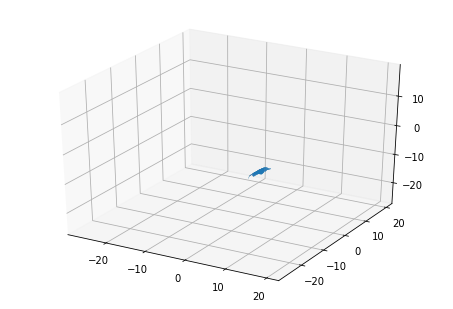

 27%|██▋       | 25/93 [01:11<03:13,  2.85s/it]

KeyboardInterrupt: 

In [52]:
from numpy import dot, array, mean
from tqdm import tqdm
from IPython.display import clear_output
from time import time
import os

all_vectors = data_mesh.vectors

def has_vertex(mat, vertex):
    return(any(dot(mat/vertex, array([1,1,1])) == 3))

def has_vector(mat, vector):
    p1,p2,p3 = vector
    return(
        has_vertex(mat, p1) #or 
#         has_vertex(mat, p2) or has_vertex(mat, p3)
    )


def identify_adj_vectors(idx=0, ignore_list=[]):
    adj_idx = []
    some_vector = all_vectors[idx]
    for (i,v) in enumerate(all_vectors):
        if (not (i in ignore_list)) and has_vector(some_vector, v):
            adj_idx += [i]
    return(adj_idx)

def identify_adj_vectors_for_list(idx_list, ignore_list=[]):
    all_addtions_found = []
    for idx in tqdm(idx_list):
        addtions_found = identify_adj_vectors(idx, ignore_list)
        ignore_list += addtions_found
        all_addtions_found += addtions_found
    return(all_addtions_found)

new_additions = [0]
ignore_list = [0]

loops = 0
loop_times = []

while len(new_additions) > 0:
    loops+=1
    start_time=time()
    new_additions = identify_adj_vectors_for_list(new_additions, ignore_list)
    end_time = time()
    loop_times += [(end_time-start_time)]
    ignore_list += new_additions
    clear_output()
    print('===========================[LOOP #%s]==========================' % (loops))
    print('> avg time: %ss/loop' % round(mean(loop_times),2))
    print('> total time: %ss' % sum(loop_times))
    print('> new_additions (%s items)' % len(new_additions))
    print('> ignore_list (%s items)' % len(ignore_list))
    print('===========================[LOOP #%s]==========================' % (loops))
    plot_data_mesh(data_mesh.vectors[ignore_list])





/home/ari/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  app.launch_new_instance()


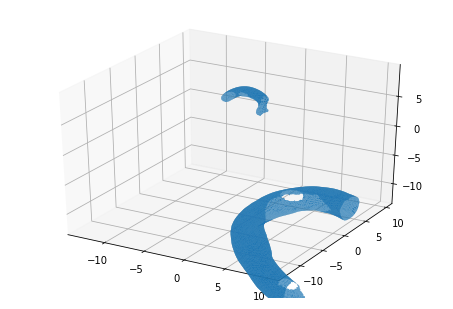

In [71]:

new_data = data_mesh.vectors[1:20000]

tmp = numpy.zeros(len(new_data), dtype=mesh.Mesh.dtype)
tmp['vectors'] = new_data
tmp_mesh = mesh.Mesh(tmp)

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(tmp_mesh.vectors))

# Auto scale to the mesh size
scale = tmp_mesh.points.flatten(-1)/4
axes.auto_scale_xyz(scale, scale, scale)

# # Show the plot to the screen
pyplot.show()

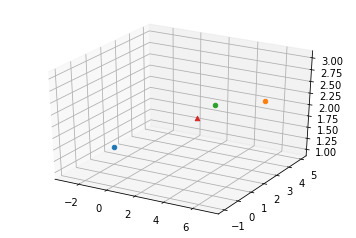

In [29]:

A = array([-3,2,1])
B = array([5,5,2])
C = array([7,-1,3])

M = dot(array([1/3,1/3,1/3]), array([A,B,C]))
dot((M-A)**2, array([1,1,1]))**0.5, dot((M-B)**2, array([1,1,1]))**0.5, dot((M-C)**2, array([1,1,1]))**0.5

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(A[0], A[1], A[2])
ax.scatter(B[0], B[1], B[2])
ax.scatter(C[0], C[1], C[2])

ax.scatter(M[0], M[1], M[2], marker='^')

plt.show()